# Изучение рынка российского кинопроката

Изучение рынка российского кинопроката и выявление текущих трендов. Анализ параметров кинематографа и сопоставление выявленных фактов. Уделение внимания фильмам, которые получили государственную поддержку. И оценка этих фильмов зрителями.
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Ход работы:

1. Открытие, объединение и изучение данных: загрузка необходимых библиотек, загрузка данных, объдинение датафреймов.
2. Предобработка данных: изменение типов данных, работа с пропусками в данных, работа с дубликатами, описание особенностей категориальных и количественных значений, добавление новых столбцов: с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма, с долей гос поддержки от общего бюджета фильма.
3. Исследовательский анализ сборов: полнота данных, динамика, среднее и медианное, возрастные ограничения (2015-2019).
4. Исследовательский анализ фильмов с господдержкой: доля субсидированных фильмов от общих, окупаемость фильмов и сборы, рейтинг фильмов, сумма финансирования, жанры  и режиссеры которые больше всего спонсируются, категории ограничений и государственное финансирование 
5. Общий вывод

## 1. Открытие, объединение и изучение данных 

Откроем данные из двух имеющихся файлов, посмотрим информацию по ним, импортируем необходимые библиотеки.

In [1]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import pandas as pd

try:
    mkrf_shows = pd.read_csv(r"C:\Users\0727G\Desktop\mkrf_shows.csv", sep=',')
    mkrf_movies = pd.read_csv(r"C:\Users\0727G\Desktop\mkrf_movies.csv", sep=',')
except:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv', sep=',')
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv', sep=',')
    
mkrf_shows.info()
mkrf_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 


Для объединения датафреймов требуется изменить тип данных в общем столбце по которому будет проходить слияние, в нашем случае это стобец 'puNumber'. Однако в таблице mkrf_movies существует строка со значением 'нет' в требуемом столбце. Исправим это заменив на произвольный номер.

In [2]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет'].info()
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 111

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1797 to 1797
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1 non-null      object 
 1   puNumber               1 non-null      object 
 2   show_start_date        1 non-null      object 
 3   type                   1 non-null      object 
 4   film_studio            1 non-null      object 
 5   production_country     1 non-null      object 
 6   director               1 non-null      object 
 7   producer               1 non-null      object 
 8   age_restriction        1 non-null      object 
 9   refundable_support     0 non-null      float64
 10  nonrefundable_support  0 non-null      float64
 11  budget                 0 non-null      float64
 12  financing_source       0 non-null      object 
 13  ratings                0 non-null      object 
 14  genres                 0 non-null      object 
dtypes: f

Изменим тип данных для объединения столбцов.

In [3]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype(int)

Теперь объединим два датафрейма в один и посмотрим с чем имеем дело.

In [4]:
data =  mkrf_shows.merge(mkrf_movies, on='puNumber', how='outer')
display(data)
data.info()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,111000113,2.450000e+03,Тайна перевала Дятлова,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика"
1,111000115,6.104000e+04,Небесный верблюд,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный"
2,111000116,1.530300e+08,"Статус: ""Свободен""",2016-01-13T12:00:00.000Z,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20000000.0,20000000.0,78686500.0,Фонд кино,5.8,"комедия,мелодрама"
3,111000117,1.226096e+07,После тебя,2017-01-10T12:00:00.000Z,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.0,20000000.0,45483233.0,"Министерство культуры, Фонд кино",6.7,драма
4,111000118,1.636841e+08,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23T12:00:00.000Z,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.2,комедия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,126008019,NaN,Сад художника: Американский импрессионизм,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,121037819,NaN,Звериная ярость,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,124010819,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,124010619,NaN,"Машины песенки. Серия ""Испанские мотивы""",2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   puNumber               7486 non-null   int64  
 1   box_office             3158 non-null   float64
 2   title                  7486 non-null   object 
 3   show_start_date        7486 non-null   object 
 4   type                   7486 non-null   object 
 5   film_studio            7468 non-null   object 
 6   production_country     7484 non-null   object 
 7   director               7477 non-null   object 
 8   producer               6918 non-null   object 
 9   age_restriction        7486 non-null   object 
 10  refundable_support     332 non-null    float64
 11  nonrefundable_support  332 non-null    float64
 12  budget                 332 non-null    float64
 13  financing_source       332 non-null    object 
 14  ratings                6519 non-null   object 
 15  genr

## 2. Предобработка данных 

### 1. Изменение типов данных

Из информации о датафрейме и документации видим, что стоит изменить тип данных следующих датафреймов: show_start_date, age_restriction, ratings.

Начнем с изменения типа даты премьеры фильма.

In [5]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.000Z')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   puNumber               7486 non-null   int64         
 1   box_office             3158 non-null   float64       
 2   title                  7486 non-null   object        
 3   show_start_date        7486 non-null   datetime64[ns]
 4   type                   7486 non-null   object        
 5   film_studio            7468 non-null   object        
 6   production_country     7484 non-null   object        
 7   director               7477 non-null   object        
 8   producer               6918 non-null   object        
 9   age_restriction        7486 non-null   object        
 10  refundable_support     332 non-null    float64       
 11  nonrefundable_support  332 non-null    float64       
 12  budget                 332 non-null    float64       
 13  fin

Далее переведем столбец с рейтингом в float. Для этого уберем рейтиг в процентах: уберем знак процентов и переведем рейтинг в десятибальный.

In [6]:
def duplicates_killer (old_dupls, gold_replacement):
    for dupl in old_dupls:
        data['ratings'] = data['ratings'].str.replace(dupl, gold_replacement)     
duplicates_killer('%', '')

data['ratings']=data['ratings'].astype(float)

for i in range(len(data['ratings'])):
    if data.loc[i, 'ratings'] > 10:
        data.loc[i, 'ratings'] = data.loc[i, 'ratings']/10
data['ratings'].unique()







array([5.1, 6.7, 5.8, 3.2, 5.3, 3. , 5.4, 6.1, 5.9, 4.7, 6.6, 6. , 7.2,
       7.1, 4.5, 7.3, 3.3, 6.8, 5.7, nan, 4.9, 4.3, 2.8, 6.2, 3.9, 1.9,
       4.8, 7. , 7.5, 6.4, 9.9, 4.2, 6.5, 5.2, 5. , 3.1, 6.3, 5.6, 3.7,
       2.6, 8. , 6.9, 7.8, 4.1, 9.1, 2.9, 7.4, 3.4, 4.6, 7.9, 8.5, 8.1,
       9.8, 7.6, 9.4, 1.4, 3.8, 7.7, 1.5, 2.7, 4.4, 4. , 2.5, 8.3, 8.8,
       1.2, 8.4, 5.5, 8.2, 8.7, 1.6, 9.2, 1. , 8.9, 9. , 2.1, 2.4, 3.5,
       8.6, 3.6, 9.7, 1.1, 1.3, 1.8, 1.7])

Теперь поработаем со столбцом age_restrictions. Вмсето того, чтобы заменять тип данных лучше создать новый столбец с которым будет проще работать (разбить столбец age_restrictions по категориям). 

In [7]:
data['age_restriction'].unique()

array(['«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории',
       '«18+» - запрещено для детей', '«12+» - для детей старше 12 лет',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [8]:
data['class_restriction'] = data['age_restriction']
data = data.replace({'class_restriction': {'«16+» - для детей старше 16 лет': 'D', 
                                           '«12+» - для детей старше 12 лет': 'C',
                                           '«6+» - для детей старше 6 лет': 'B',
                                           '«0+» - для любой зрительской аудитории': 'A',
                                           '«18+» - запрещено для детей': 'E'}})
display(data)
age_restrictions = pd.Series({'«0+» - для любой зрительской аудитории': 'A',
                               '«6+» - для детей старше 6 лет': 'B',
                               '«12+» - для детей старше 12 лет': 'C',
                               '«16+» - для детей старше 16 лет': 'D', 
                               '«18+» - запрещено для детей': 'E'}).to_frame()          
          
display(age_restrictions)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction
0,111000113,2.450000e+03,Тайна перевала Дятлова,2013-01-17 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика",D
1,111000115,6.104000e+04,Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный",A
2,111000116,1.530300e+08,"Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20000000.0,20000000.0,78686500.0,Фонд кино,5.8,"комедия,мелодрама",D
3,111000117,1.226096e+07,После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.0,20000000.0,45483233.0,"Министерство культуры, Фонд кино",6.7,драма,D
4,111000118,1.636841e+08,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.2,комедия,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,126008019,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,C
7482,121037819,NaN,Звериная ярость,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",D
7483,124010819,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A
7484,124010619,NaN,"Машины песенки. Серия ""Испанские мотивы""",2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A


,0
«0+» - для любой зрительской аудитории,A
«6+» - для детей старше 6 лет,B
«12+» - для детей старше 12 лет,C
«16+» - для детей старше 16 лет,D
«18+» - запрещено для детей,E


Добавление столбца удалось, для удобства создал табличку с категориями.

### 2. Работа с пропусками в данных 

График, показывающий пропущенные значения помогает нам определить в каких столбцах они есть и где их больше всего.

In [9]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Распределение пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')
        
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   puNumber               7486 non-null   int64         
 1   box_office             3158 non-null   float64       
 2   title                  7486 non-null   object        
 3   show_start_date        7486 non-null   datetime64[ns]
 4   type                   7486 non-null   object        
 5   film_studio            7468 non-null   object        
 6   production_country     7484 non-null   object        
 7   director               7477 non-null   object        
 8   producer               6918 non-null   object        
 9   age_restriction        7486 non-null   object        
 10  refundable_support     332 non-null    float64       
 11  nonrefundable_support  332 non-null    float64       
 12  budget                 332 non-null    float64       
 13  fin

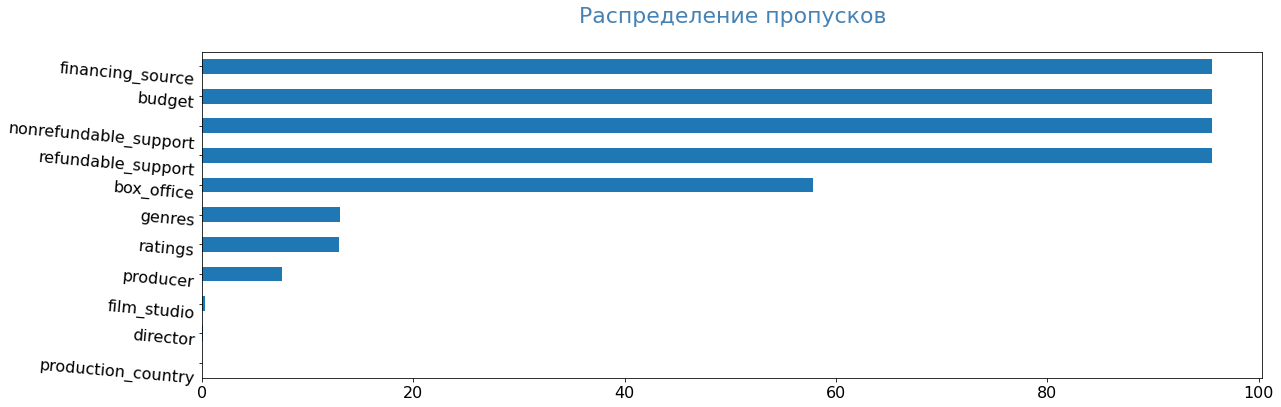

In [10]:
pass_value_barh(data)

Из информации о датафрейме и графика распределения пропусков видим, что пропуски есть в следующих столбцах: production_country, director, film_studio, producer, ratings, genres, box_office, refundable_support, nonrefundable_support, budget, financing_source

Начнем со столбца 'production_country'. Пропуски в двух строках, с помощью сайта кинопоиск определили, что фильмы российские, заменим пропуски на значения 'Россия'

In [11]:
display(data.loc[data['production_country'].isna() == True])
data['production_country'] = data['production_country'].fillna('Россия')

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction
64,111001216,194527.0,"Детский юмористический киножурнал ""Ералаш. Ну ...",2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",A
5754,214000410,NaN,Мульт личности. Выпуск 5,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",A


Теперь рассмотрим пропуски в столбце 'director'. Так как удаление 9 строк почти не окажет влияния на статистику удалим их (хотя можно также как и в предыдущем случае найти и вбить все вручную :) ).

In [12]:
display(data.loc[data['director'].isna() == True])
data = data.dropna(axis=0, subset=['director']).reset_index(drop=True)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction
3040,126003512,44350.0,"Три звезды. Концерт в Waldbuhne Theater, Берли...",2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A
4490,126003413,NaN,Помпеи. Британский музей,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A
5225,217027010,NaN,Зур концерт (Большой концерт).,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,C
5414,217017310,NaN,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A
5632,217020610,NaN,Изге Вэли (Святой Валентин),2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,C
5732,126001710,NaN,Bon Jovi. The Circle Tour,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",A
5754,214000410,NaN,Мульт личности. Выпуск 5,2010-01-25 12:00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",A
6189,126001111,NaN,Георг Фридрих Гендель. Мессия. Оратория. Корол...,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A
6206,126002711,NaN,Питер Гэбриэл и New Blood Orchestra 3D,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",A


Столбец 'film_studio' не используется в нашем исследовании, поэтому оставим пропуски в нем.

Аналогично и со столбцом 'producer' - не будем трогать пропуски в данном столбце.

А вот столбец 'ratings' важен для нас. Прямую связь с другими столбцами не наблюдаю. При этом заменить на медианное значение пропуски в данном столбце также неккоректно - это приведет к искажению статистики, так как пропуски составляют более 10% от датафрейма. Поэтому есть два пути: либо игнорировать пропуски (что приведет к неиспользованию более 10% датафрейма в работе с данным столбцом), либо заменить на среднее (что приведет к искажению статистики, но не такому сильному как в случае с медианной). И все же отдаю предпочтение 'чистоте' данных, их истинности, пропуски остаются.

In [13]:
data.loc[data['ratings'].isna() == True]

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction
24,111000518,1.445732e+09,Лёд,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.0,60000000.0,148585222.0,Фонд кино,NaN,NaN,C
30,111000614,2.040000e+04,Последнее лето,2014-01-22 12:00:00,Художественный,"ООО ""Продюсерский центр Киностудии им. М.Горьк...",Россия,Е.Звездаков,"С.Зернов, С.Кучмаева",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,E
37,111000716,8.781000e+04,Первая Мировая война WWI,2016-01-25 12:00:00,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,«12+» - для детей старше 12 лет,0.0,30000000.0,45538655.0,Фонд кино,NaN,NaN,C
48,111000917,3.554220e+05,Айсылу. Фильм,2017-01-26 12:00:00,Художественный,"Фонд ""Ника""",Россия,"Р.Рашитов, С.Сунгатуллин","В.Братухин, О.Суров, А.Барыкин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,C
76,111001418,4.052398e+06,Бегство рогатых викингов или пять дней из джиз...,2018-03-10 12:00:00,Художественный,"Ассоциация НП ""КОТ""",Россия,И.Белостоцкий,И.Белостоцкий,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,112004819,NaN,Дикие и свободные,2019-12-23 12:00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,B
7471,111023219,NaN,Эколав,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,E
7472,126008019,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,C
7474,124010819,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,A


Пропуски в столбце 'genres' заменить нельзя, если нет прямой связи с другими столбцами или какой-либо зависимости(Например, пропуски есть только в жанре драмма). Никакой связи в пропусках не вижу, поэтому заменим жанр на неизвестный для продолжения работы  с данным столбцом.

In [14]:
data['genres'] = data['genres'].fillna('неизвестно')

Сборы в рублях. В этом столбце каждое значение уникально и разброс может быть колласален. Оставим здесь пропуски.

In [15]:
display(data.loc[data['box_office'].isna() == True])

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction
3157,221048915,NaN,Открытый простор,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",E
3158,111013716,NaN,Особо важное задание,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",B
3159,221038416,NaN,Особо опасен,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",E
3160,221026916,NaN,Особо опасен,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",E
3161,221030815,NaN,Особо опасен,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,126008019,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,C
7473,121037819,NaN,Звериная ярость,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",D
7474,124010819,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,A
7475,124010619,NaN,"Машины песенки. Серия ""Испанские мотивы""",2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,A


В последних столбцах с пропусками: refundable_support, nonrefundable_support, budget, financing_source. Видим взаимосвязь друг с дружкой. Это происходит из-за того, что данные о средствах есть только по фильмам, которые получили финансирование из бюджета РФ. Следовательно, в остальных случаях такие знчения будут равны 0 или отсутсвует. Заменим пропуски, где это необходимо

In [16]:
display(data.loc[data['refundable_support'].isna() == True])
display(data.loc[data['refundable_support'].isna() == False])

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction
0,111000113,2.450000e+03,Тайна перевала Дятлова,2013-01-17 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика",D
4,111000118,1.636841e+08,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,3.2,комедия,E
6,111000212,2.000000e+02,Ржевский против Наполеона,2012-01-12 12:00:00,Художественный,"ООО ""Территория Кино""",Россия,М.Бальчунас,"ООО ""Квартал Леополис""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.0,комедия,D
8,111000313,7.100000e+02,ОХОТА НА ПРИНЦЕССУ. Часть 2,2013-01-31 12:00:00,Художественный,"ООО Киностудия ""Сагиттариус - Д""",Россия,С.Дружинина,С.Дружинина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.1,"драма,история",C
9,111000314,1.607970e+06,Чемпионы.,2014-01-15 12:00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,"А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (...","Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.9,"спорт,драма",B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,126008019,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,C
7473,121037819,NaN,Звериная ярость,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",D
7474,124010819,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,A
7475,124010619,NaN,"Машины песенки. Серия ""Испанские мотивы""",2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,A


,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction
1,111000115,6.104000e+04,Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный",A
2,111000116,1.530300e+08,"Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20000000.0,20000000.0,78686500.0,Фонд кино,5.8,"комедия,мелодрама",D
3,111000117,1.226096e+07,После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.0,20000000.0,45483233.0,"Министерство культуры, Фонд кино",6.7,драма,D
5,111000119,4.293650e+06,Пилигрим,2019-02-14 12:00:00,Художественный,"ООО ""Чайка Синема""",Россия,А.Баршак,"М.Гуцериев, Е.Север, Т.Стацман",«16+» - для детей старше 16 лет,0.0,35000000.0,115000000.0,Министерство культуры,5.3,триллер,D
7,111000216,3.555670e+05,Городские птички.,2016-01-15 12:00:00,Художественный,"ООО ""Каргофильм""",Россия,Ю.Белюсева,А.Готлиб,«16+» - для детей старше 16 лет,0.0,25000000.0,38461538.0,Министерство культуры,5.4,"комедия,мелодрама",D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7348,111015519,NaN,На Луне,2019-11-01 12:00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.0,35000000.0,57876000.0,Министерство культуры,6.6,"приключения,триллер",D
7398,111018919,NaN,Кроличья лапа,2019-11-20 12:00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.0,30000000.0,47734050.0,Министерство культуры,NaN,неизвестно,D
7466,111022519,NaN,Вторжение,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",C
7468,111023019,NaN,Я свободен,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,C


In [17]:
data['refundable_support'] = data['refundable_support'].fillna(0)

In [18]:
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)

In [19]:
data['financing_source'] = data['financing_source'].fillna('Отсутствует')

В случае с общим бюджетом фильма пропуски оставим, так как разброс бюджета может быть коллосален. Однако видим необычное явление: бюджет отсутствует в некоторых строках (равен 0). Причем как видим данные фильмы получили либо господдержку либо стороннее финансирование, заменим эти пропуски суммой этих значений.

In [20]:
data['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

In [21]:
display(data.loc[data['budget'] == 0, 'refundable_support'])
display(data.loc[data['budget'] == 0, 'nonrefundable_support'])

16            0.0
196    25000000.0
234           0.0
392    19000000.0
454    20000000.0
482           0.0
543    20000000.0
653           0.0
658    10000000.0
676           0.0
753           0.0
829    10000000.0
841    60000000.0
845    20000000.0
854    60000000.0
866    40000000.0
893           0.0
Name: refundable_support, dtype: float64

16      75000000.0
196     20000000.0
234      6000000.0
392     51000000.0
454            0.0
482     59000000.0
543     40000000.0
653     35000000.0
658     70000000.0
676    250000000.0
753     23000000.0
829     60000000.0
841    100000000.0
845     20000000.0
854    120000000.0
866     40000000.0
893    138969465.0
Name: nonrefundable_support, dtype: float64

In [22]:
data.loc[data['budget'] == 0, 'budget'] = data.loc[data['budget'] == 0, 'refundable_support'] + data.loc[data['budget'] == 0, 'nonrefundable_support']
data['budget'].describe()

count    3.320000e+02
mean     1.314224e+08
std      1.871482e+08
min      6.000000e+06
25%      4.552480e+07
50%      7.119690e+07
75%      1.500000e+08
max      2.305074e+09
Name: budget, dtype: float64

Также для удобства создадим столбец, показывающий наличие гос. финансирования.

In [23]:
data['taxes_money'] = data['financing_source']
data['taxes_money'].unique()

array(['Отсутствует', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [24]:
for number in range(len(data['taxes_money'])):
    if data.loc[number, 'taxes_money'] == 'Отсутствует':
        data.loc[number, 'taxes_money'] = 0
    else:
        data.loc[number, 'taxes_money'] = 1

С пропусками разобрались, перейдем к дубликатам.

### 3. Работа с дубликатами 

Дубликаты могут встречаться в столбцах: title, type, genres, puNumber. Проверим это и исправим, если дубликаты встретятся в данных. 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7477 entries, 0 to 7476
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   puNumber               7477 non-null   int64         
 1   box_office             3157 non-null   float64       
 2   title                  7477 non-null   object        
 3   show_start_date        7477 non-null   datetime64[ns]
 4   type                   7477 non-null   object        
 5   film_studio            7460 non-null   object        
 6   production_country     7477 non-null   object        
 7   director               7477 non-null   object        
 8   producer               6913 non-null   object        
 9   age_restriction        7477 non-null   object        
 10  refundable_support     7477 non-null   float64       
 11  nonrefundable_support  7477 non-null   float64       
 12  budget                 332 non-null    float64       
 13  fin

Начнем со столбца title, как видим здесь встречаются явные дубликаты. Заменим их. Также в столбце с названиями фильмов встречаются дубликаты: названия мультсериалов и сериалов, они выделены отдельно по одной серии, объединим их. Это позволит убрать еще 152 'дубликата'.

In [26]:
data['title'].nunique()

6763

In [27]:
def serial_killer(data, title_names):
    for title_name in title_names:
        for i in range(len(data['title'])):
            if title_name in data.loc[i, 'title']:
                data.loc[i, 'title'] = title_name
                

names = ['Машины песенки', 'МУЛЬТ в кино.', 'Маша и Медведь', 
         'Анимационный сериал "Лунтик и его друзья"', 'Детский юмористический киножурнал "Ералаш"',
         'Мы живем в России', 'Анимационный фильм "Малышарики 3"', 'Анимационный фильм "Смешарики 7"']
serial_killer(data, names)
display(data)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction,taxes_money
0,111000113,2.450000e+03,Тайна перевала Дятлова,2013-01-17 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,5.1,"ужасы,фантастика",D,0
1,111000115,6.104000e+04,Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный",A,1
2,111000116,1.530300e+08,"Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20000000.0,20000000.0,78686500.0,Фонд кино,5.8,"комедия,мелодрама",D,1
3,111000117,1.226096e+07,После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7000000.0,20000000.0,45483233.0,"Министерство культуры, Фонд кино",6.7,драма,D,1
4,111000118,1.636841e+08,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,3.2,комедия,E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,126008019,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,0.0,0.0,NaN,Отсутствует,NaN,неизвестно,C,0
7473,121037819,NaN,Звериная ярость,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,5.4,"боевик,триллер",D,0
7474,124010819,NaN,Щенячий патруль: Скорей спешим на помощь!,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,Отсутствует,NaN,неизвестно,A,0
7475,124010619,NaN,Машины песенки,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,Отсутствует,NaN,неизвестно,A,0


In [28]:
data = data.drop_duplicates(subset='title', ignore_index=True)
data['title'].nunique()

6609

Теперь рассмотрим столбец type. Из-за проблем с вводом, либо по другим причинам были значения с знаками пробела в названии (' Художественный', ' Анимационный'). Исправили этот недочет.

In [29]:
data['type'].unique()

array(['Художественный', ' Художественный', 'Научно-популярный',
       'Анимационный', 'Документальный', ' Анимационный', 'Прочие',
       'Музыкально-развлекательный'], dtype=object)

In [30]:
data['type'] = data['type'].replace(' Художественный', 'Художественный')     
data['type'] = data['type'].replace(' Анимационный', 'Анимационный')  



In [31]:
data['type'].unique()

array(['Художественный', 'Научно-популярный', 'Анимационный',
       'Документальный', 'Прочие', 'Музыкально-развлекательный'],
      dtype=object)

Теперь займемся столбцом genres. Так как первое значение строки является главным жанром фильма, то, учитывая это, дубликатов не наблюдаем.

Далее рассмотрим дубликаты в puNumber. Дубликатов нет (неявных дубликатов в толбце с уникальным номером быть не может).

In [32]:
data['puNumber'].nunique()

6609

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609 entries, 0 to 6608
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   puNumber               6609 non-null   int64         
 1   box_office             3078 non-null   float64       
 2   title                  6609 non-null   object        
 3   show_start_date        6609 non-null   datetime64[ns]
 4   type                   6609 non-null   object        
 5   film_studio            6593 non-null   object        
 6   production_country     6609 non-null   object        
 7   director               6609 non-null   object        
 8   producer               6056 non-null   object        
 9   age_restriction        6609 non-null   object        
 10  refundable_support     6609 non-null   float64       
 11  nonrefundable_support  6609 non-null   float64       
 12  budget                 331 non-null    float64       
 13  fin

### 4. Категориальные значения

В ходе предобработки выделили особенность некоторых категориальных значений, а именно столбцов age_restriction и financing_source. В age_restriction категории были записаны в виде строк, текста, с такими категориями сложно работать: код получится громоздким, да и вероятность опечатки увеличится в разы, поэтому было принято решение создать дополнительный столбец class_restriction, который упрощает возрастную классификацию, таблица с переводом значений ниже. 
А в случае со столбцом financing_source стоит условно разбить датафрейм на две части: которая финансировалась государством и которая не финансировалась. Для этого создали столбец taxes_money, где 1-финансировалось, 0-не финансировалось. Сложно работать с пропусками или выделять фильмы с финансированием, ведь источников финансирования несколько.


Также встретились с проблемой в столбце type: возможно значение вбивалось вручную в некоторых столбцах, поэтому часть значений получилась с пробелами, а значения стали по сути дубликатами. В столбце  production_country встретились с ситуацией, когда в случае с несколькими странами производителями разделение между названиями стран разделялось либо запятой, либо тире. Это также неккоректно.

In [34]:
display(age_restrictions)

,0
«0+» - для любой зрительской аудитории,A
«6+» - для детей старше 6 лет,B
«12+» - для детей старше 12 лет,C
«16+» - для детей старше 16 лет,D
«18+» - запрещено для детей,E


### 5. Количественные значения 

В количественных значениях увидел особенность в столбце ratings: там были как значения в процентах, так и значения десятибальной системы рейтинга. Возможно данные получали из разных источников с разной системой рейтинга. Столбец привели к десятибальной системе.

### 6. Добавление новых столбцов

#### 1. Создание столбца с информацией о годе проката.

In [35]:
data['show_start_year'] = data['show_start_date'].dt.year

#### 2. Создание столбцов: с именем и фамилией главного режиссёра и основным жанром фильма. 

Начнем со столбца с именем и фамилией главного режиссера. Разобьем каждую строку на имя фамилию одного режиссера и выделим первую из них в отдельный столбец.

In [36]:
s = []
for i in (data['director']):
    i = i.split(sep=',')
    s.append(i[0])
data['major_director'] = s

Теперь добавим столбец с основным жанром по аналогичной схеме.

In [37]:
a = []
for j in data['genres']:
    j = j.split(sep=',')
    a.append(j[0])
data['major_genre'] = a
display(data) 

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,class_restriction,taxes_money,show_start_year,major_director,major_genre
0,111000113,2.450000e+03,Тайна перевала Дятлова,2013-01-17 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,...,0.0,NaN,Отсутствует,5.1,"ужасы,фантастика",D,0,2013,Ренни Харлин,ужасы
1,111000115,6.104000e+04,Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,...,34000000.0,49280496.0,Министерство культуры,6.7,"детский,семейный",A,1,2015,Ю.Фетинг,детский
2,111000116,1.530300e+08,"Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,...,20000000.0,78686500.0,Фонд кино,5.8,"комедия,мелодрама",D,1,2016,П.Руминов,комедия
3,111000117,1.226096e+07,После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,...,20000000.0,45483233.0,"Министерство культуры, Фонд кино",6.7,драма,D,1,2017,А.Матисон,драма
4,111000118,1.636841e+08,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,...,0.0,NaN,Отсутствует,3.2,комедия,E,0,2018,З.Болотаев,комедия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6604,111023119,NaN,(Не)идеальный мужчина,2019-12-24 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,...,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",C,1,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия
6605,111023219,NaN,Эколав,2019-12-26 12:00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,...,0.0,NaN,Отсутствует,NaN,неизвестно,E,0,2019,Д.Григорьев,неизвестно
6606,126008019,NaN,Сад художника: Американский импрессионизм,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,...,0.0,NaN,Отсутствует,NaN,неизвестно,C,0,2019,Фил Грабски,неизвестно
6607,121037819,NaN,Звериная ярость,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,...,0.0,NaN,Отсутствует,5.4,"боевик,триллер",D,0,2019,Ник Пауэлл,боевик


#### 3. Теперь посчитаем  какую долю от общего бюджета фильма составляет господдержка.

In [38]:
data['refundable_part'] = data['refundable_support']/data['budget']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609 entries, 0 to 6608
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   puNumber               6609 non-null   int64         
 1   box_office             3078 non-null   float64       
 2   title                  6609 non-null   object        
 3   show_start_date        6609 non-null   datetime64[ns]
 4   type                   6609 non-null   object        
 5   film_studio            6593 non-null   object        
 6   production_country     6609 non-null   object        
 7   director               6609 non-null   object        
 8   producer               6056 non-null   object        
 9   age_restriction        6609 non-null   object        
 10  refundable_support     6609 non-null   float64       
 11  nonrefundable_support  6609 non-null   float64       
 12  budget                 331 non-null    float64       
 13  fin

## 3. Исследовательский анализ сборов

### 1. Изучение сборов в рублях: полнота данных.

Посмотрим количество фильмов вышедших в прокат по годам (опираясь на данные из mkrf_shows).

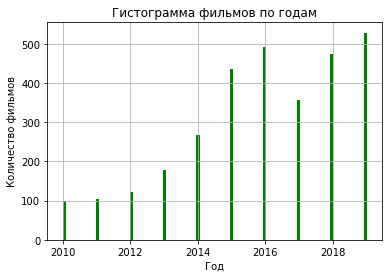

In [39]:
fig, ax = plt.subplots()
ax.hist(data.loc[data['box_office']>0,'show_start_year'], bins=100, color='g')
ax.set_title('Гистограмма фильмов по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество фильмов')
ax.grid()
plt.show()

Посчитаем долю фильмов, с наличием информации о сборах, от общего числа фильмов. 46,2 % - меньше половины.

In [40]:
part_from_all = data.loc[data['box_office']>0,'show_start_year'].count()/data['puNumber'].count()
print(part_from_all)

0.46209714026327736


Теперь посмотрим как эта доля фильмов, с наличием информации о прокате, менялась по годам. В столбце parths таблицы dh показаны числовые значения (доля).

In [41]:
dh = data.pivot_table(index='show_start_year', values=['box_office', 'puNumber'] , aggfunc=['count'])
dh['parths'] = dh[('count', 'box_office')]/dh[('count',   'puNumber')]
display(dh['parths'].sort_values(ascending=False))


show_start_year
2017    0.755839
2016    0.697872
2015    0.680620
2019    0.610405
2018    0.564133
2014    0.373297
2013    0.308998
2012    0.241379
2011    0.218029
2010    0.134387
Name: parths, dtype: float64

Далее построим линейный график по годам, показывающий  долю фильмов, информацию о сборах которых мы имеем.

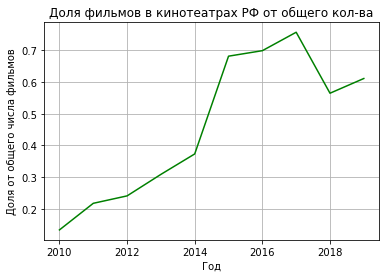

In [42]:
fig, ax = plt.subplots()
x=dh.index
y=dh['parths']
ax.plot(x, y, color='g')
ax.set_title('Доля фильмов в кинотеатрах РФ от общего кол-ва')
ax.set_xlabel('Год')
ax.set_ylabel('Доля от общего числа фильмов')
ax.grid()
plt.show()

Посмотрев на гистограмму видим, что больше всего фильмов было показано в 2015, 2016, 2017 и 2019 годах. Посчитав долю фильмов, с наличием информации о сборах, от общего числа фильмов -  46,2 % - меньше половины - приходим к выводу, что больше половины датафрейма не используется в анализе с использованием сборов в рублях. (Это не хорошо! Достоверность вывода снижается, уменьшается выборка). Однако смотря на распределение доли фильмов по годам можем сказать, что большие доли заполненых данных приходятся на 2015-2017 года, далее проседание в 2018 и рост в 2019. Общий тренд положителен и это не может не радовать :)

### 2. Изучение сборов в рублях: динамика. 

Построим 2 столбчатые диаграммы распределения суммы сборов в рублях по годам и посчитаем сумму по годам в таблице sum_box

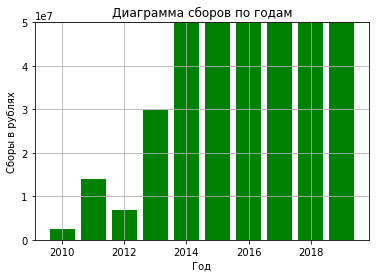

In [43]:
fig, ax = plt.subplots()
sum_box = data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
ax.bar(x=sum_box.index, height=sum_box['box_office'], color='g')
ax.set_title('Диаграмма сборов по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Сборы в рублях')
ax.grid()
plt.ylim((0, 0.5e8))
plt.show()

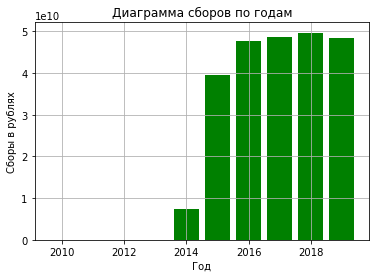

In [44]:
fig, ax = plt.subplots()
sum_box = data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
ax.bar(x=sum_box.index, height=sum_box['box_office'], color='g')
ax.set_title('Диаграмма сборов по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Сборы в рублях')
ax.grid()
plt.show()

In [45]:
display(sum_box['box_office'].sort_values(ascending=False))

show_start_year
2018    4.966840e+10
2017    4.856155e+10
2019    4.842507e+10
2016    4.779152e+10
2015    3.942542e+10
2014    7.444947e+09
2013    2.979331e+07
2011    1.401652e+07
2012    6.807863e+06
2010    2.427754e+06
Name: box_office, dtype: float64

Очень большой разброс сборов от 2,5 миллионов в 2010 до почти 50 миллиардов в 2018. Конечно же стоит сопоставить эти данные с долей фильмов о которых мы имеем информацию (в 2010 также самая маленькая доля фильмов с информацией о сборах), но здесь выявляется удивительная особенность количество фильмов в 2018 почти самое большое, а вот доля от известных значений совсем нет (всего 0,56) следовательно количество фильмов за 2018 в целом датафрейме должно быть больше остальных. Также из этих данных следует, что фильмы были более кассовыми, чем в другие года. 
В целом по динамике можно сказать, что в 2014 и 2015 годах был мощнейший скачок сборов, возможно была произведена какая-либо реформа, повлиявшая на это. После 2014 количечтво сборов увеличилось в разы. Также выросла отчетность о них (видим из предыдущего пункта).

### 3. Изучение сборов в рублях: среднее и медианное.  

Построим сводную таблицу со средним и медианным значение сборов по годам. И нарисуем столбчатые диаграммы.

In [46]:
mean_med_box = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
display(mean_med_box)

,mean,median
,box_office,box_office
show_start_year,,
2010,2.380151e+04,1.705000e+03
2011,1.347742e+05,3.042500e+03
2012,5.403066e+04,5.260000e+03
2013,1.636995e+05,3.522500e+03
2014,2.717134e+07,2.031000e+04
2015,8.980733e+07,6.457303e+06
2016,9.713724e+07,4.757063e+06
2017,1.364089e+08,1.017783e+07


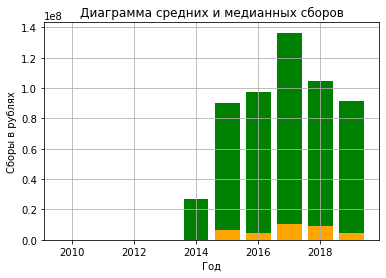

In [47]:
fig, ax = plt.subplots()
ax.bar(x=mean_med_box.index, height=mean_med_box[('mean', 'box_office')], color='g')
ax.bar(x=mean_med_box.index, height=mean_med_box[('median', 'box_office')], color='orange')
ax.set_title('Диаграмма средних и медианных сборов')
ax.set_xlabel('Год')
ax.set_ylabel('Сборы в рублях')
ax.grid()
plt.show()

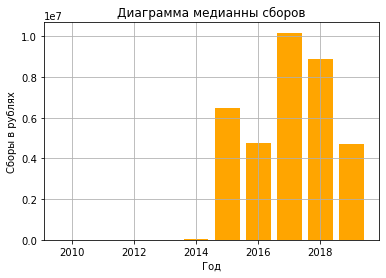

In [48]:
fig, ax = plt.subplots()
ax.bar(x=mean_med_box.index, height=mean_med_box[('median', 'box_office')], color='orange')
ax.set_title('Диаграмма медианны сборов')
ax.set_xlabel('Год')
ax.set_ylabel('Сборы в рублях')
ax.grid()
plt.show()

Максимальное среднее и медианное было в 2017 году (136 млн. и 10 млн соответсвенно), при этом на первом графике и таблице видим, что среднее в десятки раз отличается от медианного, приина этому разность в сборах: может быть 30 фильмов с небольшими сборами и один фильм известного режиссера с огромными сборами в результате среднее будет большое(ближе к максимуму), а медианное ближе к общей массе(маленькие сборы). 2017 год является вторым по сумме сборов после 2018 года и их значения отличаются не сильно.

### 4. Изучение сборов в рублях: возрастные ограничения (2015-2019). 

Исследуя возрастные ограничения будем работать со столбцом class_restriction. Для удобства выделим в датафрейм строки 2015-2019 годов с информацией о сборах в рублях. Построим столбчатую диаграмму и сводную таблицу по сумме и количеству сборов по категориям возрастных ограничений.  

In [49]:
data15_19 = data.loc[data['show_start_year'] > 2014]
data15_19 = data15_19.loc[data['box_office'] > 0]
display(data15_19)

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,budget,financing_source,ratings,genres,class_restriction,taxes_money,show_start_year,major_director,major_genre,refundable_part
1,111000115,6.104000e+04,Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,...,49280496.0,Министерство культуры,6.7,"детский,семейный",A,1,2015,Ю.Фетинг,детский,0.000000
2,111000116,1.530300e+08,"Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,...,78686500.0,Фонд кино,5.8,"комедия,мелодрама",D,1,2016,П.Руминов,комедия,0.254173
3,111000117,1.226096e+07,После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,...,45483233.0,"Министерство культуры, Фонд кино",6.7,драма,D,1,2017,А.Матисон,драма,0.153903
4,111000118,1.636841e+08,ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,...,NaN,Отсутствует,3.2,комедия,E,0,2018,З.Болотаев,комедия,NaN
5,111000119,4.293650e+06,Пилигрим,2019-02-14 12:00:00,Художественный,"ООО ""Чайка Синема""",Россия,А.Баршак,"М.Гуцериев, Е.Север, Т.Стацман",«16+» - для детей старше 16 лет,...,115000000.0,Министерство культуры,5.3,триллер,D,1,2019,А.Баршак,триллер,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,211005918,7.224150e+05,Остров исправления,2018-03-06 12:00:00,Художественный,"ООО ""Студия игрового кино ""Краски""",Россия,А.Протоковило,Д.Вязников,«12+» - для детей старше 12 лет,...,NaN,Отсутствует,4.8,комедия,C,0,2018,А.Протоковило,комедия,NaN
3057,211024117,5.561387e+06,ТЕСНОТА,2017-05-23 12:00:00,Художественный,"Некоммерческий фонд поддержки кинематографа ""П...",Россия,К.Балагов,Н.Янкин,«18+» - запрещено для детей,...,NaN,Отсутствует,6.7,драма,E,0,2017,К.Балагов,драма,NaN
3060,211055715,6.400000e+03,Параллели,2015-12-05 12:00:00,Художественный,"ООО ""Продюсерский центр Натальи Ивановой""",Россия,Т.Харкевич,Н.Иванова,«16+» - для детей старше 16 лет,...,NaN,Отсутствует,5.6,"боевик,фантастика",D,0,2015,Т.Харкевич,боевик,NaN
3062,214006116,5.116400e+04,Мультфильмы по выходным. Непослушные истории,2016-04-29 12:00:00,Анимационный,"Некоммерческая организация ""Фонд поддержки ани...",Россия,"А.Демин, Р.Синкевич, Н.Березовая, О.Ужинов и др.","Т.Семенов, И.Гелашвили, А.Добрунов, Н.Маковски...",«6+» - для детей старше 6 лет,...,NaN,Отсутствует,5.8,"ужасы,фэнтези,драма",B,0,2016,А.Демин,ужасы,NaN


In [50]:
sum_restrictions = data15_19.pivot_table(index='class_restriction', values='box_office', aggfunc=['sum', 'count'])
display(sum_restrictions.sort_values(by=('sum', 'box_office'), ascending=False))

,sum,count
,box_office,box_office
class_restriction,,
D,7.603065e+10,796
C,6.061896e+10,345
B,5.579608e+10,313
E,4.075944e+10,789
A,6.668432e+08,43


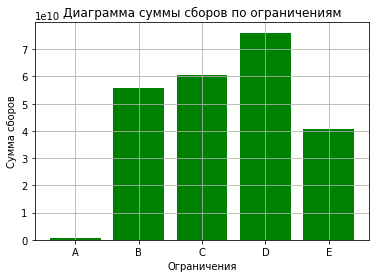

In [51]:
fig, ax = plt.subplots()
ax.bar(x=sum_restrictions.index, height=sum_restrictions[('sum', 'box_office')], color='g')
ax.set_title('Диаграмма суммы сборов по ограничениям')
ax.set_xlabel('Ограничения')
ax.set_ylabel('Сумма сборов')
ax.grid()
plt.show()

Из диаграммы и таблицы сборов видим следующее: Самые минимальные сборы в возрастной категории 0+, при чем отличие от других групп координальное. Самые большие сборы у фильмов 16+. Смотря на количество фильмов можем сказать, что категория 16+ также самая многочисленная, а категория 0+ самая малочисленная это частично объясняет такое распределение данных суммы сборов по категориям, но разница в сумме категорий 0+ и 16+ почти в сто раз, тогда как количество отличается в менее чем 10 раз и категория 18+, которая занимает второе место по количеству, по сумме сборов занимает предпоследнее и сильно отличается суммой от 16+. Что-то странное, посмотрим на среднее и медиану (может подскажут чего?)

Построим столбчатую диаграмму и сводную таблицу по среднему и медиане сборов по категориям ограничений.

In [52]:
mean_med_15_19 = data15_19.pivot_table(index='class_restriction', values='box_office', aggfunc=['mean', 'median'])
display(mean_med_15_19.sort_values(by=('mean', 'box_office'), ascending=False))

,mean,median
,box_office,box_office
class_restriction,,
B,1.782623e+08,14901756.00
C,1.757071e+08,5350538.00
D,9.551589e+07,5728857.52
E,5.165961e+07,6188067.00
A,1.550798e+07,742164.00


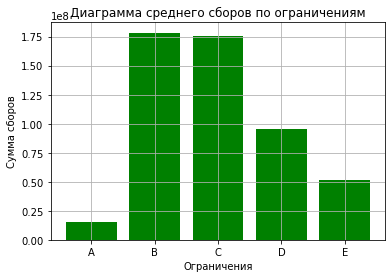

In [53]:
fig, ax = plt.subplots()
ax.bar(x=mean_med_15_19.index, height=mean_med_15_19[('mean', 'box_office')], color='g')
ax.set_title('Диаграмма среднего сборов по ограничениям')
ax.set_xlabel('Ограничения')
ax.set_ylabel('Сумма сборов')
ax.grid()
plt.show()

А вот и ответ: категория 16+ берет первое место по сумме количетсвом и 'средним' средним ( =) ). Но среднее по категории 18+ сильно меньше категории 16+ (почти два раза) данные полностью логичны. Из этого можно сделать вывод, что меньше всего сниммают фильмов 0+ и скорее всего потому что они меньше всего приносят сборов. Больше всего по количестсву снимают фильмы 16+(максимум сборов плюс ко всему). Но при этом самое кассовое кино в среднем в категории 6+ (делают деньги на детях, можно объяснить тем, что дети новорожденные до определенного возраста не являются активными любителями мультиков, а то с 6 лет самое то, из кинотеатра не вытащишь).

Теперь посмотрим на распределение сборов по категории ограничений по годам. Для этого построим сводные таблицы по каждому году со значением суммы, количества, среднего и медианны

In [54]:
df_3 = data15_19.loc[data['show_start_year'] == 2015].pivot_table(index='class_restriction', values='box_office', aggfunc=['sum', 'count', 'mean', 'median'])
display(df_3.sort_values(by=('sum', 'box_office'), ascending=False))

,sum,count,mean,median
,box_office,box_office,box_office,box_office
class_restriction,,,,
C,1.361608e+10,72,1.891123e+08,15959668.30
D,1.136812e+10,166,6.848264e+07,4878669.70
B,8.699277e+09,52,1.672938e+08,23125984.70
E,5.432308e+09,132,4.115385e+07,4616614.70
A,3.096329e+08,14,2.211664e+07,2793612.55


In [55]:
df_4 = data15_19.loc[data['show_start_year'] == 2016].pivot_table(index='class_restriction', values='box_office', aggfunc=['sum', 'count', 'mean', 'median'])
display(df_4.sort_values(by=('sum', 'box_office'), ascending=False))

,sum,count,mean,median
,box_office,box_office,box_office,box_office
class_restriction,,,,
D,1.666262e+10,176,9.467396e+07,5686963.27
C,1.220442e+10,81,1.506719e+08,4845355.00
B,1.205314e+10,67,1.798976e+08,4004861.50
E,6.793925e+09,149,4.559681e+07,6375092.00
A,7.741633e+07,18,4.300907e+06,243796.50


In [56]:
df_5 = data15_19.loc[data['show_start_year'] == 2017].pivot_table(index='class_restriction', values='box_office', aggfunc=['sum', 'count', 'mean', 'median'])
display(df_5.sort_values(by=('sum', 'box_office'), ascending=False))

,sum,count,mean,median
,box_office,box_office,box_office,box_office
class_restriction,,,,
D,1.874289e+10,120,1.561907e+08,10150100.5
B,1.208614e+10,45,2.685809e+08,51992103.0
E,9.651496e+09,147,6.565643e+07,8212677.0
C,7.851428e+09,41,1.914982e+08,9010548.0
A,2.295989e+08,3,7.653298e+07,22178956.0


In [57]:
df_6 = data15_19.loc[data['show_start_year'] == 2018].pivot_table(index='class_restriction', values='box_office', aggfunc=['sum', 'count', 'mean', 'median'])
display(df_6.sort_values(by=('sum', 'box_office'), ascending=False))

,sum,count,mean,median
,box_office,box_office,box_office,box_office
class_restriction,,,,
D,1.650360e+10,156,1.057923e+08,9.010639e+06
C,1.426729e+10,67,2.129447e+08,8.931966e+06
B,1.010497e+10,68,1.486026e+08,1.468885e+07
E,8.760086e+09,179,4.893903e+07,7.179466e+06
A,3.244900e+07,5,6.489800e+06,3.616937e+06


In [58]:
df_7 = data15_19.loc[data['show_start_year'] == 2019].pivot_table(index='class_restriction', values='box_office', aggfunc=['sum', 'count', 'mean', 'median'])
display(df_7.sort_values(by=('sum', 'box_office'), ascending=False))

,sum,count,mean,median
,box_office,box_office,box_office,box_office
class_restriction,,,,
B,1.285255e+10,81,1.586734e+08,1.287535e+07
D,1.275342e+10,178,7.164842e+07,3.210718e+06
C,1.267973e+10,84,1.509492e+08,3.498501e+06
E,1.012162e+10,182,5.561330e+07,5.658057e+06
A,1.774607e+07,3,5.915356e+06,3.885434e+06


В 2015 году лидерам по сборам стала категория 12+: причина высокое среднее (при этом медианна гораздо меньше среднего: однозначно вышло несколько фильмов с очень большими сборами, которые изменили всю стастистику за этот год). 2016-2018 года в целом повторяют картину общих рассчетов по категориям ограничений. А вот в 2019 году рекордсменом по сумме сборов становится категория 6+. Причина в высокой медиане и среднем (сняли много фильмов с хорошими сборами).

### 5. Изучение сборов в рублях: общий вывод. 

Больше всего фильмов (с информацией о сборах) было показано в 2015, 2016, 2018 и 2019 годах. Доля от общего числа фильмов с информацией о сборах (за все года) - 46,2 % - меньше половины из доступных. Однако смотря на распределение доли фильмов по годам можем сказать, что большие доли заполненых данных приходятся на 2015-2017 года, далее проседание в 2018 и рост в 2019. Общий тренд положителен и это не может не радовать
Очень большой разброс суммы сборов от 2,5 миллионов в 2010 до почти 50 миллиардов в 2018. Количество фильмов за 2018 в исходных данных больше остальных. По динамике можно сказать, что в 2014 и 2015 годах был мощнейший скачок сборов и с 2014 количество сборов увеличилось в разы. Также выросло количество информации по сборам с 2014 года.
Максимальное среднее и медианное было в 2017 году (136 млн. и 10 млн соответсвенно). При этом среднее в десятки раз отличается от медианного, причина этому разность в сборах: может быть 30 фильмов с небольшими сборами и один фильм известного режиссера с огромными сборами в результате среднее будет большое (ближе к максимуму), а медианное ближе к общей массе(маленькие сборы).
Самые минимальные сборы в возрастной категории 0+, при чем отличие от других групп координальное. Самые большие сборы у фильмов 16+. Смотря на количество фильмов можем сказать, что категория 16+ также самая многочисленная, а категория 0+ самая малочисленная. Категория 16+ берет первое место по сумме количетсвом и 'средним' средним. меньше всего сниммают фильмов 0+ и скорее всего потому что они меньше всего приносят сборов. Больше всего по количестсву снимают фильмы 16+. При этом самое кассовое кино в среднем в категории 6+.
В 2015 году лидерам по сборам стала категория 12+: причина высокое среднее (при этом медианна гораздо меньше среднего: однозначно вышло несколько фильмов с очень большими сборами, которые изменили всю стастистику за этот год). 2016-2018 года в целом повторяют картину общих рассчетов по категориям ограничений. А вот в 2019 году рекордсменом по сумме сборов становится категория 6+. Причина в высокой медиане и среднем (сняли много фильмов с хорошими сборами).


## 4. Исследовательский анализ фильмов с господдержкой 

### 1. Доля субсидированных фильмов от общих.

Определим какая доля от общего числа фильмов финансировалась государством

Как видим финансировались только полностью российские фильмы или фильмы с участием России. Выделим эти фильмы в отдельный датафрейм для удобства работы.

In [59]:
data.loc[data['taxes_money'] == 1, 'production_country'].unique()

array(['Россия', 'Россия-Украина',
       'Россия, Германия, Казахстан, Польша, Китай', 'Россия, Армения',
       'Россия, Сербия', 'Россия, Италия', 'Россия, Украина, Польша',
       'Россия-Словакия-Чехия', 'Россия, Германия',
       'Россия, Германия, Великобритания', 'Россия-Китай',
       'Россия, Франция, Латвия', 'Россия, Латвия, Чешская Республика',
       'Россия - Грузия', 'Россия, Бельгия, Финляндия'], dtype=object)

In [60]:
rus_film = []
for k in data['production_country']:
    k = k.split(sep=',') 
    rus_film.append(k[0])
data['rus_film'] = rus_film
rus_films = []
for x in data['rus_film']:
    x = x.split(sep='-') 
    rus_films.append(x[0])
data['rus_film'] = rus_films
rus_df=data.loc[data['rus_film'] == 'Россия']
rus_df['taxes_money'] = rus_df['taxes_money'].astype(int)

Финансировалось 19% фильмов по всем годам. И, исходя из наших данных, тоько начиная с 2013 года. Самое большое количество фильмов финансировалось в 2015 году.

In [61]:
part_ref_all = rus_df.loc[rus_df['taxes_money'] == 1, 'taxes_money'].count()/rus_df['taxes_money'].count()
print(part_ref_all)

0.18998272884283246


In [62]:
rus_pivot = rus_df.pivot_table(index='show_start_year', values='taxes_money', aggfunc='mean')
display(rus_pivot.sort_values(by='taxes_money'))

,taxes_money
show_start_year,
2010,0.000000
2011,0.000000
2012,0.000000
2013,0.026667
2014,0.122137
2018,0.124722
2019,0.233677
2017,0.376147
2016,0.386076


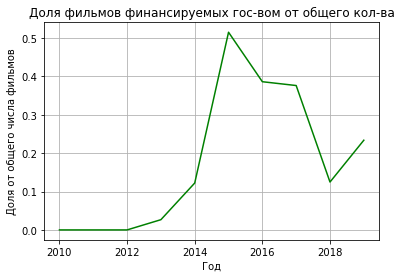

In [63]:
fig, ax = plt.subplots()
x=rus_pivot.index
y=rus_pivot['taxes_money']
ax.plot(x, y, color='g')
ax.set_title('Доля фильмов финансируемых гос-вом от общего кол-ва')
ax.set_xlabel('Год')
ax.set_ylabel('Доля от общего числа фильмов')
ax.grid()
plt.show()

Финансировалось 19% фильмов по всем годам. И, исходя из наших данных, тоько начиная с 2013 года. Самая большая доля фильмов финансировалось в 2015 году и до этого года наблюдался рост доли фильмов по господдержке.

### 2. Окупаемость фильмов по господдержке и сборы.

Теперь посмотрим на сумму сборов финансируемых государством фильмов по годам. 

Для удобства работы выделим только те фильмы, которые спонсировались государством, в отдельный датафрейм. Опираясь на диаграмму, таблицу и данные по доли фильмов можно сказать, что несмотря на уменьшение доли фильмов спонсируемых государством самые большие сборы были в 2017 году при этом спонсировалось всего 39 фильмов. 

In [64]:
rf_df = rus_df.loc[rus_df['taxes_money'] == 1]
df_8 = rf_df.pivot_table(index='show_start_year', values='box_office', aggfunc=['sum', 'mean', 'median', 'count'])
display(df_8.sort_values(by=('sum', 'box_office'), ascending=False))

,sum,mean,median,count
,box_office,box_office,box_office,box_office
show_start_year,,,,
2017,1.086508e+10,2.785917e+08,50451949.00,39
2018,9.934069e+09,1.773941e+08,27023390.31,56
2019,8.409627e+09,1.401605e+08,25977291.30,60
2016,6.081708e+09,1.013618e+08,17921115.61,60
2015,5.785285e+09,6.806218e+07,9200824.50,85
2014,1.017422e+09,6.358889e+07,5504517.85,16
2013,2.032239e+07,1.016119e+07,10161192.55,2


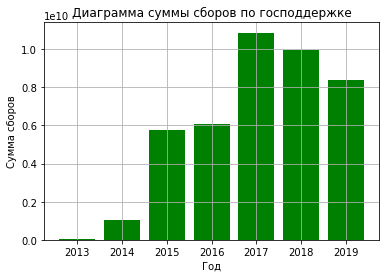

In [65]:
fig, ax = plt.subplots()
ax.bar(x=df_8.index, height=df_8[('sum', 'box_office')], color='g')
ax.set_title('Диаграмма суммы сборов по господдержке')
ax.set_xlabel('Год')
ax.set_ylabel('Сумма сборов')
ax.grid()
plt.show()

Теперь посмотрим на окупаемость фильмов.

In [66]:
rf_df['payback']  = rf_df['box_office'] - rf_df['budget']
rf_df['payback'].describe()

count    3.180000e+02
mean     4.256980e+05
std      3.159104e+08
min     -1.971477e+09
25%     -7.069443e+07
50%     -4.068082e+07
75%     -2.362182e+06
max      2.913569e+09
Name: payback, dtype: float64

In [67]:
df_9 = rf_df.loc[rus_df['taxes_money'] == 1].pivot_table(index='show_start_year', values='payback', aggfunc=['sum', 'mean', 'median', 'count'])
display(df_9.sort_values(by=('sum', 'payback'), ascending=False))

,sum,mean,median,count
,payback,payback,payback,payback
show_start_year,,,,
2017,3.913503e+09,1.003462e+08,-3.322228e+07,39
2018,2.933405e+09,5.238223e+07,-3.759403e+07,56
2013,-2.351130e+08,-1.175565e+08,-1.175565e+08,2
2014,-2.850626e+08,-1.781641e+07,-3.812277e+07,16
2016,-1.454529e+09,-2.424215e+07,-5.200880e+07,60
2015,-1.911385e+09,-2.248688e+07,-3.880566e+07,85
2019,-2.825446e+09,-4.709077e+07,-4.590981e+07,60


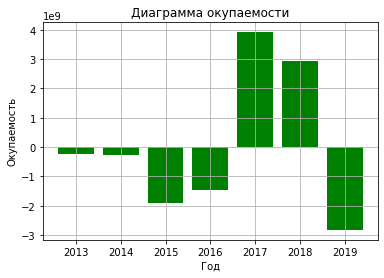

In [68]:
fig, ax = plt.subplots()
ax.bar(x=df_9.index, height=df_9[('sum', 'payback')], color='g')
ax.set_title('Диаграмма окупаемости')
ax.set_xlabel('Год')
ax.set_ylabel('Окупаемость')
ax.grid()
plt.show()

В среднем окупаемость есть, небольшая - 425698 рублей (среднее от общей окупаемости за все годы). Два года когда окупалось гос финансирование: 2017 и 2018 причем среднее и медиана сильно отличаются, следоватеьно было несколько фильмов-лидеров собравших макисмальную окупаемость значительно превышающуе окупаемость других фильмов. А вот и эти фильмы: 2017: Движение вверх, Последний богатырь, Ёлки Новые, Три богатыря и принцесса Египта, Салют-7; 2018: Т-34, Лёд, Я худею, Ёлки Последние, Тренер. По остальным годам фильмы не окупались и уходили в минус. Особенный минус наблюдался в 2019 году, самый убыточный год. 

In [69]:
display(rf_df.loc[rf_df['show_start_year'] == 2017].sort_values(by='payback', ascending=False)['title'].head())
display(rf_df.loc[rf_df['show_start_year'] == 2018].sort_values(by='payback', ascending=False)['title'].head())

529                     Движение вверх
334                 Последний богатырь
521                         Ёлки Новые
833    Три богатыря и принцесса Египта
328                            Салют-7
Name: title, dtype: object

753              Т-34
24                Лёд
87            Я худею
750    Ёлки Последние
149            Тренер
Name: title, dtype: object

### 3. Рейтинг фильмов по господдержке

Посмотрим на самые популярные фильмы финансируемые государством. Для этого необходимо быть уверенным в объективности оценки рейтинга, к приеру если фильм имеет два-три отзыва оценка будет не объективной, следовательно стоит выбирать фильмы с количетсвом суммы сборов больше приемлемой. Для этого примем, что отзывы оставляет 2,2 % зрителей(данную информацию получил из исследования аудитории городских и российских кинотеатров за 2017-18гг. (Фонд кино)) средняя цена билета в российском кинотеатре 323,7 рублей (источник m24) возьмем за объктивную оценку отзывы от 1000 человек. Минимальный проходной сбор составитя: 100%*1000чел.*323,7 руб./2,2 = 14.713.636 рублей.

In [70]:
min_box = rf_df.loc[rf_df['box_office'] > 14713636]

In [71]:
print(min_box['ratings'].mean())
print(min_box['ratings'].median())

5.945679012345681
6.2


In [72]:
display(min_box.sort_values(by='ratings', ascending=False).head(3))
display(min_box.sort_values(by='ratings').head(3))

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,class_restriction,taxes_money,show_start_year,major_director,major_genre,refundable_part,rus_film,payback
656,111017416,228578204.0,БОЛЬШОЙ,2016-11-22 12:00:00,Художественный,"ЗАО ""ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО""",Россия,В.Тодоровский,"В.Тодоровский, А.Златопольский",«12+» - для детей старше 12 лет,...,8.5,"криминал,комедия,боевик",C,1,2016,В.Тодоровский,криминал,0.031250,Россия,-91421796.0
139,111002915,249166767.7,А зори здесь тихие..._,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,...,8.5,"драма,военный,история",C,1,2015,Р.Давлетьяров,драма,0.226667,Россия,28578373.7
320,111006719,408646665.7,Миллиард,2019-04-17 12:00:00,Художественный,"ООО ""Медиа Юниверсал Ивент""",Россия,Р.Прыгунов,"В.Маслов, В.Верещагин, Б.Анисимов",«12+» - для детей старше 12 лет,...,8.2,драма,C,1,2019,Р.Прыгунов,драма,0.000000,Россия,168605358.7


,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,ratings,genres,class_restriction,taxes_money,show_start_year,major_director,major_genre,refundable_part,rus_film,payback
713,111020018,7.079867e+07,Крымский мост. Сделано с любовью,2018-10-29 12:00:00,Художественный,"ООО ""Студия ""8 рядов""",Россия,Т.Кеосаян,Д.Кеосаян,«12+» - для детей старше 12 лет,...,2.5,"комедия,мелодрама",C,1,2018,Т.Кеосаян,комедия,0.000000,Россия,-8.344702e+07
837,114003715,3.833450e+07,Богатырша,2015-12-23 12:00:00,Анимационный,"ООО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Гюлумян, В.Саргсян",«6+» - для детей старше 6 лет,...,2.8,мультфильм,B,1,2015,О.Лопато,мультфильм,0.241761,Россия,-2.371015e+07
104,111002017,3.428987e+08,Крым (2017),2017-04-12 12:00:00,Художественный,"ООО ""Пиманов и партнеры""",Россия,А.Пиманов,А.Пиманов,«16+» - для детей старше 16 лет,...,2.9,"драма,боевик",D,1,2017,А.Пиманов,драма,0.089882,Россия,1.203849e+08


Фильмы с наивысшим рейтингом: 'Большой' режиссера Валерия Тодоровского (8.5), 'А зори здесь тихие' режиссера Рената Давлетьярова (8.5), 'Миллиард' режиссера Романа Прыгунова (8.2).Фильмы С наименьшим рейтингом: 'Крымский мост. Сделано с любовью' режиссера Тиграна Кеосаяна (2.5), 'Богатырша' режиссера Ольги Лопато (2.8), 'Крым(2017)' режиссера Алексея Пиманова (2.9). Средний рейтинг фильмов, финансируемых государством 5,95; медианный 6.2. По этим данным можно сказать, что зрителей удовлетворяют фильмы, спонсируемые государством.

### 4.  Сумма финансирования

Теперь посмотрим на сумму финансирования фильмов государством. Построим таблицу с суммой финансирования и другими параметрами и построим столбчатую диаграмму, но начнем с добавления столбца полного финансирования.

In [73]:
rf_df['full_support'] = rf_df['refundable_support']+rf_df['nonrefundable_support']
print(rf_df['full_support'].sum())
print(rf_df['full_support'].mean())

19675688312.0
59623297.915151514


In [74]:
df_11 = rf_df.pivot_table(index='show_start_year', values='full_support', aggfunc=['sum', 'mean', 'median'])
display(df_11.sort_values(by=('sum', 'full_support'), ascending=False))

,sum,mean,median
,full_support,full_support,full_support
show_start_year,,,
2019,4.379000e+09,6.439706e+07,40000000.0
2016,4.303155e+09,7.054353e+07,35000000.0
2015,3.656241e+09,4.251444e+07,30000000.0
2018,3.446969e+09,6.155303e+07,45000000.0
2017,3.183972e+09,7.765785e+07,40000000.0
2014,5.720023e+08,3.575014e+07,27500000.0
2013,1.343479e+08,6.717397e+07,67173972.5


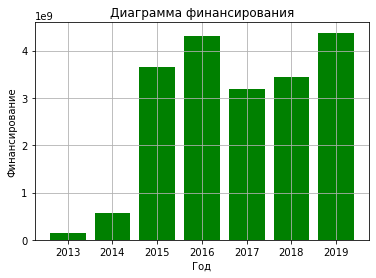

In [75]:
fig, ax = plt.subplots()
ax.bar(x=df_11.index, height=df_11[('sum', 'full_support')], color='g')
ax.set_title('Диаграмма финансирования')
ax.set_xlabel('Год')
ax.set_ylabel('Финансирование')
ax.grid()
plt.show()

С 2013 года начался рост финансирования резкий скачок был в 2015, после 2016 рост сменило падение, но затем в 2019 году взлет до максимума. Сумма финансирования составила в 2019 году 4 миллиарда 379 миллионов рублей. Но, к сожалению окупаемость в этот год была  максимально отрицательной. Всего с 2013 по 2019 выделили 19 миллиардов 676 миллионов. В среднем на один фильм выделялось почти 60 млн. рублей.

### 5. Жанры которые больше всего спонсируются 

Теперь рассмотрим жанры фильмов.

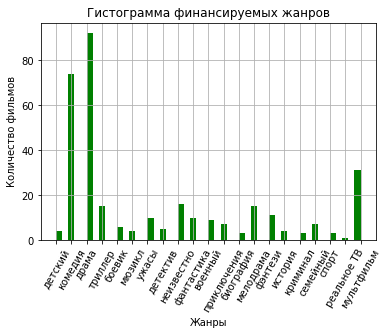

In [76]:
fig, ax = plt.subplots()
ax.hist(rf_df['major_genre'], bins=50, color='g')
ax.set_title('Гистограмма финансируемых жанров')
ax.set_xlabel('Жанры')
ax.set_ylabel('Количество фильмов')
ax.xaxis.set_tick_params(rotation=60, labelsize=10)
ax.grid()
plt.show()

In [77]:
rf_df['major_genre'].value_counts()

драма          92
комедия        74
мультфильм     31
неизвестно     16
мелодрама      15
триллер        15
фэнтези        11
ужасы          10
фантастика     10
военный         9
семейный        7
приключения     7
боевик          6
детектив        5
детский         4
мюзикл          4
история         4
биография       3
спорт           3
криминал        3
реальное ТВ     1
Name: major_genre, dtype: int64

In [78]:
genres_pivot = rf_df.pivot_table(index='major_genre', values='full_support', aggfunc=['sum', 'mean'])
display(genres_pivot.sort_values(by=('sum', 'full_support'), ascending=False))

,sum,mean
,full_support,full_support
major_genre,,
драма,5.289407e+09,5.749355e+07
комедия,3.218283e+09,4.349031e+07
мультфильм,2.461520e+09,7.940387e+07
фэнтези,1.032900e+09,9.390000e+07
история,1.020000e+09,2.550000e+08
фантастика,9.060000e+08,9.060000e+07
триллер,7.696453e+08,5.130969e+07
приключения,6.960000e+08,9.942857e+07


Больше всего государство спонсирует драмы, комедии и мультфильмы как по сумме средств так и по количеству фильмов. Меньше всего реальное ТВ по двум параметрам. А вот в среднем на фильм больше всего государство поддреживает исторический и спортивный жанры. Мало фильмов жанров спорт и история, возможно, если бы люди больше снимали исторических фильмов вместо комедий или драм, история была бы на первом месте по сумме финансирования. Пока смотрим драмы.

### 6.  Режиссеры которые больше всего спонсируются.

Теперь посмотрим на режиссеров, получающих господдержку.

In [79]:
rf_df['major_director'].value_counts()

Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
К.Шипенко        3
А.Котт           3
                ..
Ю.Белюсева       1
И.Кордзаия       1
В.Бортко         1
В.Щегольков      1
Р.Ильясов        1
Name: major_director, Length: 269, dtype: int64

Чаще всего спонсируемый государством режисер: Ренат Давлетьяров. Кстати его фильм 'А зори здесь тихие' получил самый высокий рейтинг среди финансируемых государством фильмов.

### 7. Категории ограничений и государственное финансирование

Теперь посмотрим на ограничения по возрасту: как финансируются разные категории. Для этого построим сводную таблицу суммы финансирования по категориям, столбчатую диаграмму и гистограмму по количеству фильмов.

In [80]:
df_12 = rf_df.pivot_table(index='class_restriction', values='full_support', aggfunc=['sum', 'mean', 'median'])
display(df_12.sort_values(by=('sum', 'full_support'), ascending=False))

,sum,mean,median
,full_support,full_support,full_support
class_restriction,,,
C,7.299394e+09,6.951804e+07,40000000.0
B,5.546374e+09,8.532883e+07,50000000.0
D,5.544053e+09,4.471011e+07,30000000.0
E,1.012347e+09,3.615525e+07,30000000.0
A,2.735200e+08,3.419000e+07,29500000.0


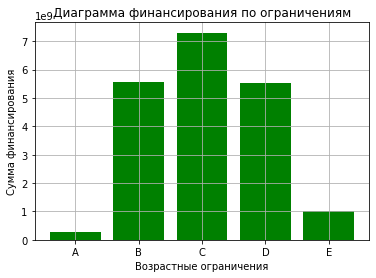

In [81]:
fig, ax = plt.subplots()
ax.bar(x=df_12.index, height=df_12[('sum', 'full_support')], color='g')
ax.set_title('Диаграмма финансирования по ограничениям')
ax.set_xlabel('Возрастные ограничения')
ax.set_ylabel('Сумма финансирования')
ax.grid()
plt.show()

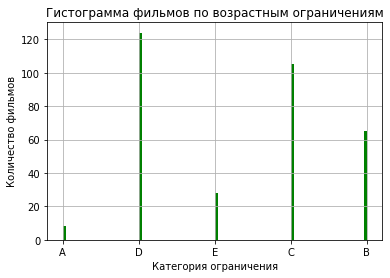

In [82]:
fig, ax = plt.subplots()
ax.hist(rf_df['class_restriction'], bins=100, color='g')
ax.set_title('Гистограмма фильмов по возрастным ограничениям')
ax.set_xlabel('Категория ограничения')
ax.set_ylabel('Количество фильмов')
ax.grid()
plt.show()

Больше всего финансируется как по сумме финансирования, так и по количеству фильмы категорий 16+, 12+ и 6+. Категории 0+ и 18+ почти не спонсируются. Скорее всего это связано со средней суммой сборов: в категориях 0+ и 18+ она самая маленькая (невыгодно), что было показано в 3 разделе текущей работы.

### 8. Вывод 

Зарубежные фильмы не финансировались. Финансировалось 19% фильмов по всем годам (от общего). Самая большая доля фильмов финансировалось в 2015 году и до этого года наблюдался рост доли фильмов по господдержке. 
Несмотря на уменьшение доли фильмов спонсируемых государством самые большие сборы были в 2017 году при этом спонсировалось всего 39 фильмов. В среднем окупаемость есть, небольшая - 425698 рублей (среднее от общей окупаемости за все годы). Два года когда окупалось гос. финансирование: 2017 и 2018 причем среднее и медиана сильно отличаются, следоватеьно было несколько фильмов-лидеров собравших макисмальную окупаемость значительно превышающуе окупаемость других фильмов. А вот и эти фильмы: 2017: Движение вверх, Последний богатырь, Ёлки Новые; 2018: Т-34, Лёд, Я худею. По остальным годам фильмы не окупались и уходили в минус. Особенный минус наблюдался в 2019 году, самый убыточный год.
Фильмы с наивысшим рейтингом: 'Большой' режиссера Валерия Тодоровского (8.5), 'А зори здесь тихие' режиссера Рената Давлетьярова (8.5), 'Миллиард' режиссера Романа Прыгунова (8.2).Фильмы С наименьшим рейтингом: 'Крымский мост. Сделано с любовью' режиссера Тиграна Кеосаяна (2.5), 'Богатырша' режиссера Ольги Лопато (2.8), 'Крым(2017)' режиссера Алексея Пиманова (2.9). Средний рейтинг фильмов, финансируемых государством 5,95; медианный 6.2. По этим данным можно сказать, что зрителей удовлетворяют фильмы, спонсируемые государством.
С 2013 года начался рост финансирования резкий скачок был в 2015, после 2016 рост сменило падение, но затем в 2019 году взлет до максимума. Сумма финансирования составила в 2019 году 4 миллиарда 379 миллионов рублей. Но, к сожалению окупаемость в этот год была максимально отрицательной. Всего с 2013 по 2019 выделили 19 миллиардов 676 миллионов. В среднем на один фильм выделялось почти 60 млн. рублей.
Больше всего государство спонсирует драмы, комедии и мультфильмы как по сумме средств так и по количеству фильмов. Меньше всего реальное ТВ по двум параметрам. А вот в среднем на фильм больше всего государство поддреживает исторический и спортивный жанры.
Чаще всего спонсируемый государством режисер: Ренат Давлетьяров. Кстати его фильм 'А зори здесь тихие' получил самый высокий рейтинг среди финансируемых государством фильмов.
Больше всего финансируется как по сумме финансирования, так и по количеству фильмы категорий 16+, 12+ и 6+. Категории 0+ и 18+ почти не спонсируются. Скорее всего это связано со средней суммой сборов: в категориях 0+ и 18+ она самая маленькая (невыгодно), что было показано в 3 разделе текущей работы.

## 5. Общий вывод

Больше всего фильмов (с информацией о сборах) было показано в 2015, 2016, 2018 и 2019 годах. Доля от общего числа фильмов с информацией о сборах (за все года) - 46,2 % - меньше половины из доступных. Однако смотря на распределение доли фильмов по годам можем сказать, что большие доли заполненых данных приходятся на 2015-2017 года, далее проседание в 2018 и рост в 2019. Общий тренд положителен.Очень большой разброс суммы сборов от 2,5 миллионов в 2010 до почти 50 миллиардов в 2018. Количество фильмов за 2018 в исходных данных больше остальных. По динамике можно сказать, что в 2014 и 2015 годах был мощнейший скачок сборов и с 2014 количество сборов увеличилось в разы. Также выросло количество информации по сборам с 2014 года. Максимальное среднее и медианное было в 2017 году (136 млн. и 10 млн соответсвенно). При этом среднее в десятки раз отличается от медианного, причина этому разность в сборах: может быть 30 фильмов с небольшими сборами и один фильм известного режиссера с огромными сборами в результате среднее будет большое (ближе к максимуму), а медианное ближе к общей массе(маленькие сборы). Самые минимальные сборы в возрастной категории 0+, причем отличие от других групп координальное. Самые большие сборы у фильмов 16+. Смотря на количество фильмов можем сказать, что категория 16+ также самая многочисленная, а категория 0+ самая малочисленная. Категория 16+ берет первое место по сумме количетсвом и 'средним' средним. меньше всего сниммают фильмов 0+ и скорее всего потому что они меньше всего приносят сборов. Больше всего по количестсву снимают фильмы 16+. При этом самое кассовое кино в среднем в категории 6+. В 2015 году лидерам по сборам стала категория 12+: причина высокое среднее (при этом медианна гораздо меньше среднего: однозначно вышло несколько фильмов с очень большими сборами, которые изменили всю стастистику за этот год). 2016-2018 года в целом повторяют картину общих рассчетов по категориям ограничений. А вот в 2019 году рекордсменом по сумме сборов становится категория 6+. Причина в высокой медиане и среднем (сняли много фильмов с хорошими сборами).

Зарубежные фильмы не финансировались государством. Финансировалось 19% фильмов по всем годам (от российских). Самая большая доля фильмов финансировалось в 2015 году и до этого года наблюдался рост доли фильмов по господдержке. 
Несмотря на уменьшение доли фильмов спонсируемых государством самые большие сборы были в 2017 году при этом спонсировалось всего 39 фильмов. В среднем окупаемость есть, небольшая - 425698 рублей (среднее от общей окупаемости за все годы). Два года когда окупалось гос. финансирование: 2017 и 2018 причем среднее и медиана сильно отличаются, следоватеьно было несколько фильмов-лидеров собравших макисмальную окупаемость значительно превышающуе окупаемость других фильмов. А вот и эти фильмы: 2017: Движение вверх, Последний богатырь, Ёлки Новые; 2018: Т-34, Лёд, Я худею. По остальным годам фильмы не окупались и уходили в минус. Особенный минус наблюдался в 2019 году, самый убыточный год.
Фильмы с наивысшим рейтингом: 'Большой' режиссера Валерия Тодоровского (8.5), 'А зори здесь тихие' режиссера Рената Давлетьярова (8.5), 'Миллиард' режиссера Романа Прыгунова (8.2).Фильмы С наименьшим рейтингом: 'Крымский мост. Сделано с любовью' режиссера Тиграна Кеосаяна (2.5), 'Богатырша' режиссера Ольги Лопато (2.8), 'Крым(2017)' режиссера Алексея Пиманова (2.9). Средний рейтинг фильмов, финансируемых государством 5,95; медианный 6.2. По этим данным можно сказать, что зрителей удовлетворяют фильмы, спонсируемые государством.
С 2013 года начался рост финансирования резкий скачок был в 2015, после 2016 рост сменило падение, но затем в 2019 году взлет до максимума. Сумма финансирования составила в 2019 году 4 миллиарда 379 миллионов рублей. Но, к сожалению окупаемость в этот год была максимально отрицательной. Всего с 2013 по 2019 выделили 19 миллиардов 676 миллионов. В среднем на один фильм выделялось почти 60 млн. рублей.
Больше всего государство спонсирует драмы, комедии и мультфильмы как по сумме средств так и по количеству фильмов. Меньше всего реальное ТВ по двум параметрам. А вот в среднем на фильм больше всего государство поддреживает исторический и спортивный жанры.
Чаще всего спонсируемый государством режисер: Ренат Давлетьяров. Кстати его фильм 'А зори здесь тихие' получил самый высокий рейтинг среди финансируемых государством фильмов.
Больше всего финансируется как по сумме финансирования, так и по количеству фильмы категорий 16+, 12+ и 6+. Категории 0+ и 18+ почти не спонсируются. Скорее всего это связано со средней суммой сборов: в категориях 0+ и 18+ она самая маленькая (невыгодно), что было показано в 3 разделе текущей работы.